In [1]:
from Agents import SARSA_QTable, SARSA_LSFA
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
gamespace = (7,50)
args = { # 1-5
        'OPP_STRAT' : 1,
        # Default 1
        'OPP_FREQ' : 1,
        # Default 1000000, 10000  (QT, LSFA/DNN)
        'NUM_EPISODES' : 1000000, # All   
        # Default 0.9,1,1 (QT, LSFA,DNN)          
        'GAMMA' : 0.9,
        # Default 0.2, 0.008, 0.0005  (QT,LSFA,DNN)
        'ALPHA' : 0.2, # SARSA, MC, LSFA    !!!! Change for LSFA
        # Default 0.05, 0.01
        'EPSILON' : 0.05, # SARSA, MC         !!!! Change for LSFA
        # Default: 10000,100
        'AVG_WINDOW' : 100,  #          
        # Default: 1000
        'TEST_EPISODES': 1000,
        # Default: True
        'CHECK_STABLE': True,
        # Default: ''
        'add_label' : '',
    }

  0%|                                                      | 1238/1000000 [00:00<02:39, 6260.22it/s]

Training:


 40%|██████████████████████████                                       | 2/5 [00:00<00:00,  6.31it/s]

--- 2.81 minutes ---
Evaluating:


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Evaluating:


  0%|                                                       | 550/1000000 [00:00<03:01, 5499.56it/s]

Training:


 40%|██████████████████████████                                       | 2/5 [00:00<00:00,  5.84it/s]

--- 3.54 minutes ---
Evaluating:


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Evaluating:


  0%|                                                      | 1286/1000000 [00:00<02:49, 5897.35it/s]

Training:


 20%|█████████████                                                    | 1/5 [00:00<00:00,  7.17it/s]

--- 3.22 minutes ---
Evaluating:


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Evaluating:


  0%|                                                      | 1706/1000000 [00:00<01:59, 8331.64it/s]

Training:


 40%|██████████████████████████                                       | 2/5 [00:00<00:00,  5.37it/s]

--- 2.53 minutes ---
Evaluating:


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Evaluating:


  0%|                                                       | 663/1000000 [00:00<02:31, 6617.83it/s]

Training:


 20%|█████████████                                                    | 1/5 [00:00<00:00,  7.25it/s]

--- 3.03 minutes ---
Evaluating:


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Evaluating:


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.69it/s]
/Users/sunaybhat/miniconda3/envs/py36_ML/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/sunaybhat/miniconda3/envs/py36_ML/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


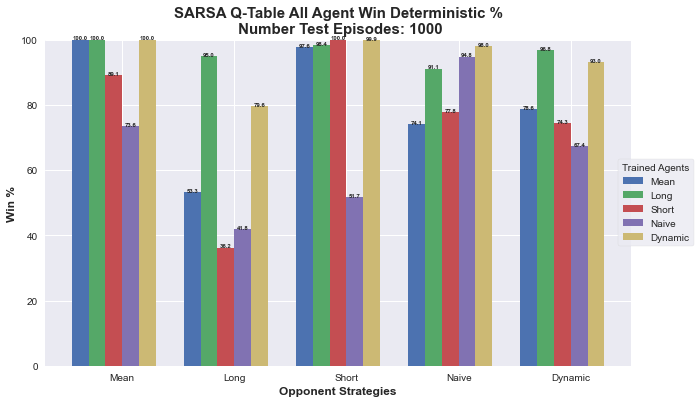

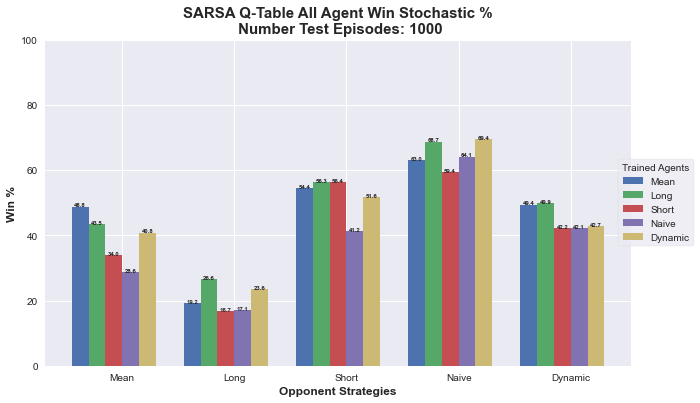

In [3]:
# Run All Q-table
stringM = 'SARSA Q-Table'
savepath = 'Data/SARSA_QT/'
test_win_percent_D = np.zeros((5,5))
test_win_percent_S = np.zeros((5,5))

fig1,ax3 = plt.subplots(1,1,figsize=(10.5,6))
xlabels = ['Mean','Long','Short','Naive','Dynamic']
ax3.set_title(stringM + ' All Agent Win Deterministic %\n Number Test Episodes: {}'.format(args['TEST_EPISODES']),fontweight='bold',fontsize = 15)

fig2,ax4 = plt.subplots(1,1,figsize=(10.5,6))
ax4.set_title(stringM + ' All Agent Win Stochastic %\n Number Test Episodes: {}'.format(args['TEST_EPISODES']),fontweight='bold',fontsize = 15)

for i in range (0,5):
    args['OPP_STRAT'] = i+1
    Agent = SARSA_QTable(args)
    Agent.train()
    test_win_percent_D[i,:] = Agent.evaluate()
    Agent.label = '_Stochastic'
    test_win_percent_S[i,:] = Agent.evaluate(output_type=0)

    ax3.bar(np.arange(5)+i*0.15-0.375,test_win_percent_D[i,:],width=0.15)
    for ibar,y in enumerate(test_win_percent_D[i,:]):
        ax3.text(ibar+i*0.15-0.375, y, y, ha = 'center',fontweight='bold',fontsize = 6)

    ax4.bar(np.arange(5)+i*0.15-0.375,test_win_percent_S[i,:],width=0.15)
    for ibar,y in enumerate(test_win_percent_S[i,:]):
        ax4.text(ibar+i*0.15-0.375, y, y, ha = 'center',fontweight='bold',fontsize = 6)


ax3.set_xlabel('Opponent Strategies',fontweight='bold',fontsize = 12)
ax3.set_ylabel('Win %',fontweight='bold',fontsize = 12)
ax3.set_ylim([0,100])
ax3.set_xticklabels(['','Mean','Long','Short','Naive','Dynamic'])
ax3.legend(['Mean','Long','Short','Naive','Dynamic'],title='Trained Agents',loc='center left', frameon=True,bbox_to_anchor=(0.97, 0.5))

ax4.set_xlabel('Opponent Strategies',fontweight='bold',fontsize = 12)
ax4.set_ylabel('Win %',fontweight='bold',fontsize = 12)
ax4.set_ylim([0,100])
ax4.set_xticklabels(['','Mean','Long','Short','Naive','Dynamic'])
ax4.legend(['Mean','Long','Short','Naive','Dynamic'],title='Trained Agents',loc='center left', frameon=True,bbox_to_anchor=(0.97, 0.5))

fig1.savefig( savepath + 'TestAll_D.png')
fig2.savefig(savepath + 'TestAll_S.png')
np.save(savepath + 'TestResults_Determ.npy',test_win_percent_D)
np.save(savepath + 'TestResults_Stoch.npy',test_win_percent_S)

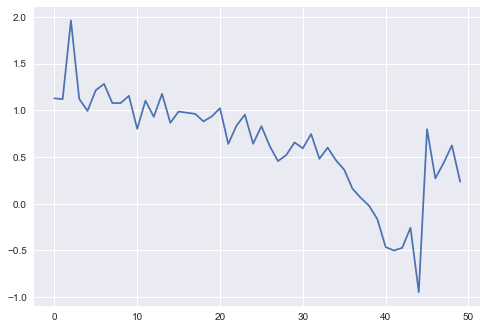

In [4]:
plt.plot(Agent.Q_val[-1,45,42,:])

In [5]:
gamespace = (7,50)
args = { # 1-5
        'OPP_STRAT' : 1,
        # Default 1
        'OPP_FREQ' : 1,
        # Default 1000000, 10000  (QT, LSFA/DNN)
        'NUM_EPISODES' : 10000, # All   
        # Default 0.9,1,1 (QT, LSFA,DNN)          
        'GAMMA' : 1,
        # Default 0.2, 0.008, 0.0005  (QT,LSFA,DNN)
        'ALPHA' : 0.008, # SARSA, MC, LSFA    !!!! Change for LSFA
        # Default 0.05, 0.01
        'EPSILON' : 0.05, # SARSA, MC         !!!! Change for LSFA
        # Default: 10000,100
        'AVG_WINDOW' : 100,  #          
        # Default: 1000
        'TEST_EPISODES': 1000,
        # Default: True
        'CHECK_STABLE': True,
        # Default: ''
        'add_label' : '',
    }

  0%|                                                                         | 0/5 [00:00<?, ?it/s]Iterations: 1
--- 1.11 minutes ---
Evaluating:
  0%|▏                                                          | 36/10000 [00:00<00:55, 178.74it/s]Unstable run (7.08%) ...
Training Iteration 2:
  0%|▏                                                          | 36/10000 [00:00<01:02, 160.14it/s]Unstable run (8.20%) ...
Training Iteration 3:
  0%|▏                                                          | 31/10000 [00:00<01:05, 151.56it/s]Unstable run (20.05%) ...
Training Iteration 4:
  1%|▎                                                          | 54/10000 [00:00<00:38, 261.30it/s]Unstable run (6.18%) ...
Training Iteration 5:
  0%|▏                                                          | 39/10000 [00:00<00:51, 195.12it/s]Unstable run (5.97%) ...
Training Iteration 6:
  0%|▏                                                          | 32/10000 [00:00<01:08, 145.85it/s]Unstable run (45.

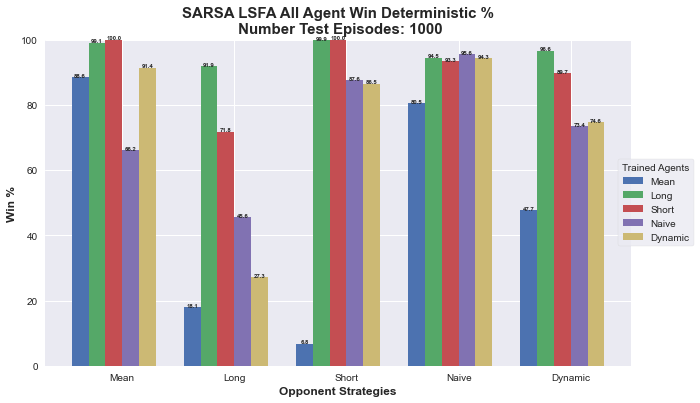

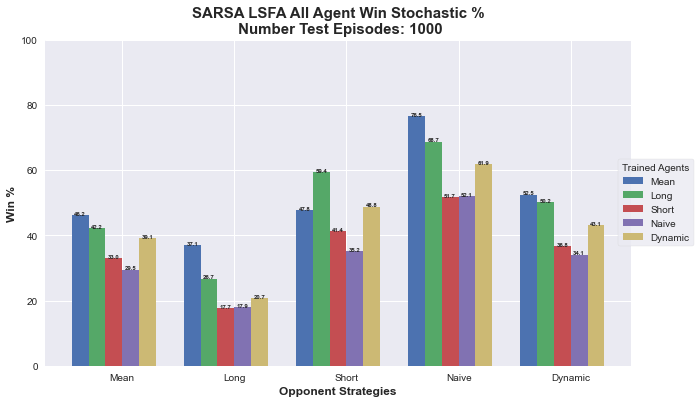

In [6]:
# Run All Q-table
stringM = 'SARSA LSFA'
savepath = 'Data/SARSA_LSFA/'
test_win_percent_D = np.zeros((5,5))
test_win_percent_S = np.zeros((5,5))

fig1,ax3 = plt.subplots(1,1,figsize=(10.5,6))
xlabels = ['Mean','Long','Short','Naive','Dynamic']
ax3.set_title(stringM + ' All Agent Win Deterministic %\n Number Test Episodes: {}'.format(args['TEST_EPISODES']),fontweight='bold',fontsize = 15)

fig2,ax4 = plt.subplots(1,1,figsize=(10.5,6))
ax4.set_title(stringM + ' All Agent Win Stochastic %\n Number Test Episodes: {}'.format(args['TEST_EPISODES']),fontweight='bold',fontsize = 15)

for i in range (0,5):
    args['OPP_STRAT'] = i+1
    Agent = SARSA_LSFA(args)
    Agent.train()
    test_win_percent_D[i,:] = Agent.evaluate()
    Agent.label = '_Stochastic'
    test_win_percent_S[i,:] = Agent.evaluate(output_type=0)

    ax3.bar(np.arange(5)+i*0.15-0.375,test_win_percent_D[i,:],width=0.15)
    for ibar,y in enumerate(test_win_percent_D[i,:]):
        ax3.text(ibar+i*0.15-0.375, y, y, ha = 'center',fontweight='bold',fontsize = 6)

    ax4.bar(np.arange(5)+i*0.15-0.375,test_win_percent_S[i,:],width=0.15)
    for ibar,y in enumerate(test_win_percent_S[i,:]):
        ax4.text(ibar+i*0.15-0.375, y, y, ha = 'center',fontweight='bold',fontsize = 6)


ax3.set_xlabel('Opponent Strategies',fontweight='bold',fontsize = 12)
ax3.set_ylabel('Win %',fontweight='bold',fontsize = 12)
ax3.set_ylim([0,100])
ax3.set_xticklabels(['','Mean','Long','Short','Naive','Dynamic'])
ax3.legend(['Mean','Long','Short','Naive','Dynamic'],title='Trained Agents',loc='center left', frameon=True,bbox_to_anchor=(0.97, 0.5))

ax4.set_xlabel('Opponent Strategies',fontweight='bold',fontsize = 12)
ax4.set_ylabel('Win %',fontweight='bold',fontsize = 12)
ax4.set_ylim([0,100])
ax4.set_xticklabels(['','Mean','Long','Short','Naive','Dynamic'])
ax4.legend(['Mean','Long','Short','Naive','Dynamic'],title='Trained Agents',loc='center left', frameon=True,bbox_to_anchor=(0.97, 0.5))

fig1.savefig( savepath + 'TestAll_D.png')
fig2.savefig(savepath + 'TestAll_S.png')
np.save(savepath + 'TestResults_Determ.npy',test_win_percent_D)
np.save(savepath + 'TestResults_Stoch.npy',test_win_percent_S)